# Previsão de Notas de Estudantes - Kaggle Playground S6E1

## Sumário Executivo

Este projeto tem como objetivo desenvolver um modelo de machine learning para prever notas de estudantes (exam_score) utilizando dados educacionais sintéticos gerados por deep learning. O conjunto de dados contém 900.000 registros com informações demográficas, hábitos de estudo e fatores ambientais que influenciam o desempenho acadêmico.

## Estrutura do Documento

1. **Configuração do Ambiente** - Importação de bibliotecas e configurações iniciais
2. **Análise Exploratória de Dados** - Compreensão do dataset e identificação de padrões
3. **Pré-processamento** - Transformação de dados e engenharia de features
4. **Modelagem** - Desenvolvimento e avaliação de modelos preditivos
5. **Conclusões e Próximos Passos** - Resultados obtidos e recomendações

---

## 1. Configuração do Ambiente

### 1.1 Importação de Bibliotecas

Nesta seção são importadas as bibliotecas essenciais para análise de dados, visualização e modelagem.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Carregamento dos Dados

Os datasets de treino e teste são carregados a partir dos arquivos CSV correspondentes.

In [4]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [5]:
train.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


#### Análise das Features

O dataset contém as seguintes características:
- **Demográficas**: idade, gênero, curso
- **Hábitos de Estudo**: horas de estudo, frequência em aula, método de estudo
- **Fatores Ambientais**: acesso à internet, horas de sono, qualidade do sono
- **Infraestrutura**: avaliação das instalações, dificuldade da prova
- **Target**: exam_score (nota do exame)

In [6]:
test.head(0)

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty


#### Estrutura dos Dados de Teste

Os dados de teste não contêm a variável target (exam_score), que é o valor que precisamos prever.

In [7]:
print(train.shape) #dados de treino
print(test.shape) #dados de teste

(630000, 13)
(270000, 12)


#### Dimensões do Dataset

- **Total de registros**: 900.000
- **Dados de treino**: 630.000 (70%)
- **Dados de teste**: 270.000 (30%)

In [8]:
print(train.isnull().sum())
print(test.isnull().sum())

id                  0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64
id                  0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
dtype: int64


#### Qualidade dos Dados

Não foram identificados valores nulos nos datasets de treino e teste, indicando boa qualidade dos dados.

In [9]:
test.describe()

,id,age,study_hours,class_attendance,sleep_hours
count,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000
mean,764999.500000,20.544137,4.003878,71.982509,7.072070
std,77942.430678,2.260452,2.357741,17.414695,1.745513
min,630000.000000,17.000000,0.080000,40.600000,4.100000
25%,697499.750000,19.000000,1.980000,57.000000,5.600000
50%,764999.500000,21.000000,4.010000,72.600000,7.100000
75%,832499.250000,23.000000,6.050000,87.200000,8.600000
max,899999.000000,24.000000,7.910000,99.400000,9.900000


### 1.3 Separação de Features e Target

Os dados são divididos em features (variáveis independentes) e target (variável dependente).

In [10]:
# Definir colunas
target = 'exam_score'
id_col = 'id'
numeric_features = ['age', 'study_hours', 'class_attendance', 'sleep_hours'] #dados numericos
categorical_features = ['gender', 'course', 'internet_access', 'sleep_quality',
                       'study_method', 'facility_rating', 'exam_difficulty'] #dados categoricos

X = train.drop([id_col, target], axis=1) #feature ssem o ID
y = train[target] #target
X_test = test.drop([id_col], axis=1) #features de teste

print(X.shape)
print(y.shape)
print(X_test.shape)


(630000, 11)
(630000,)
(270000, 11)


## 2. Análise Exploratória de Dados

### 2.1 Análise da Variável Target

Nesta seção é realizada a análise exploratória dos dados para compreender as distribuições e correlações.

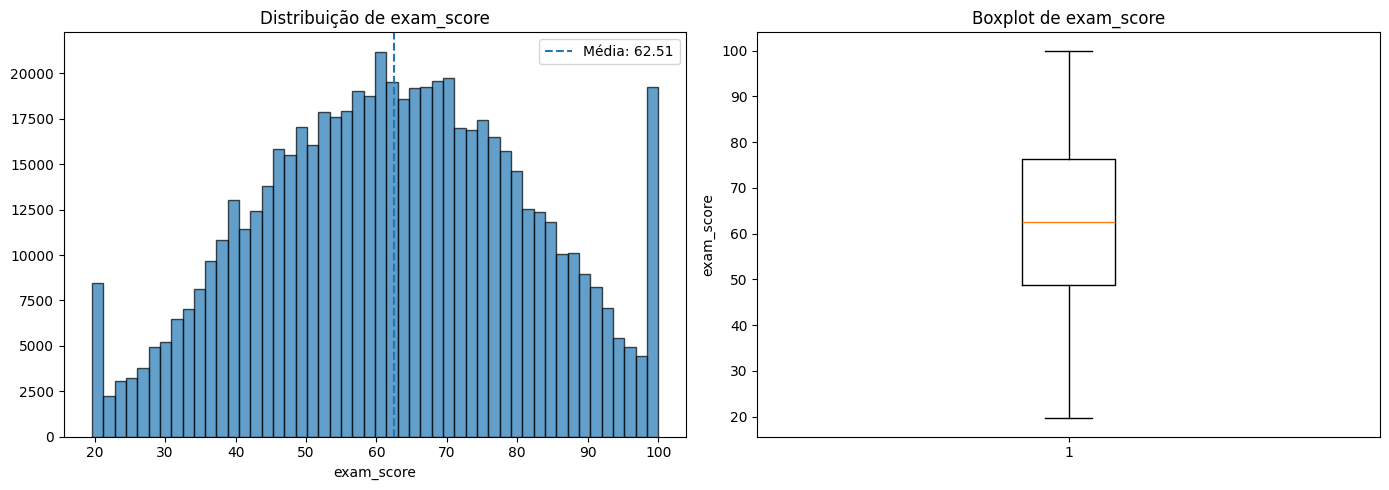

In [11]:
# Visualização
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(y, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribuição de exam_score')
axes[0].set_xlabel('exam_score')
axes[0].axvline(y.mean(), linestyle='--', label=f'Média: {y.mean():.2f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(y)
axes[1].set_title('Boxplot de exam_score')
axes[1].set_ylabel('exam_score')

plt.tight_layout()
plt.show()

#### Observações sobre a Distribuição

- **Simetria**: A mediana está muito próxima da média, reforçando a simetria da distribuição
- **Concentração**: A maior densidade de valores está entre 50 e 75 pontos
- **Interpretação**: A maioria dos estudantes apresenta desempenho médio a bom

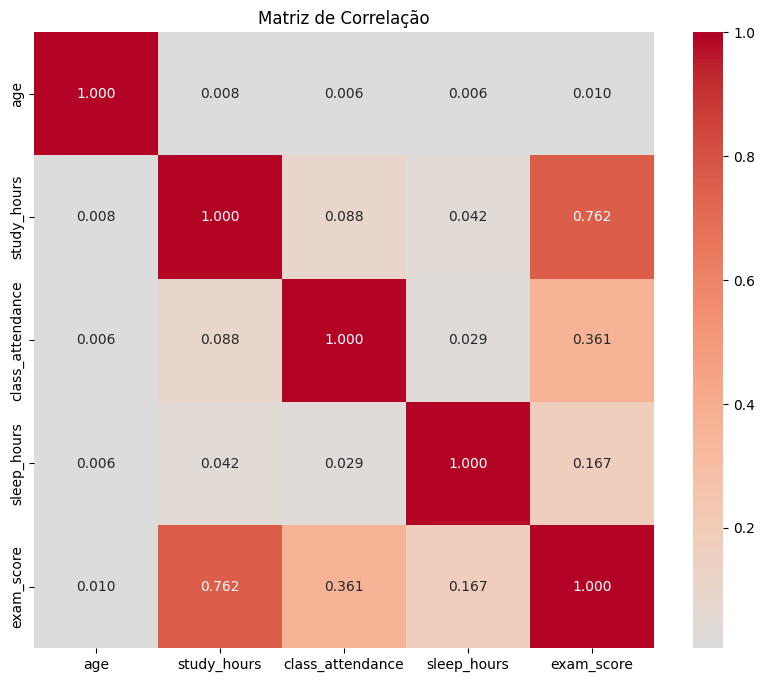

Correlações com o target:
exam_score          1.000000
study_hours         0.762267
class_attendance    0.360954
sleep_hours         0.167410
age                 0.010472
Name: exam_score, dtype: float64


In [12]:
# Correlação entre variáveis numéricas
numeric_data = train[numeric_features + [target]] #osmente features numericas e o que queremos analisar
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()
print("Correlações com o target:")
print(correlation_matrix[target].sort_values(ascending=False))


### 2.2 Análise de Correlação

#### Insights Principais

- **Horas de estudo (0.76)**: Maior correlação positiva com as notas
- **Frequência em aula (0.36)**: Segunda maior correlação positiva
- **Horas de sono (0.17)**: Correlação positiva moderada
- **Idade (0.01)**: Correlação praticamente nula

### 2.3 Análise de Variáveis Categóricas

#### Impacto das Features Categóricas no Desempenho

In [13]:
# Média de exam_score por categoria
for col in categorical_features:
    means = train.groupby(col)[target].mean().sort_values(ascending=False)
    print(f"\n{col}:")
    print(means)


gender:
gender
other     62.781191
female    62.563220
male      62.175561
Name: exam_score, dtype: float64

course:
course
bba        63.232038
bca        62.586227
b.com      62.537726
b.tech     62.519707
diploma    62.404354
b.sc       62.295491
ba         61.886931
Name: exam_score, dtype: float64

internet_access:
internet_access
yes    62.509172
no     62.478038
Name: exam_score, dtype: float64

sleep_quality:
sleep_quality
good       67.884885
average    62.662000
poor       56.995470
Name: exam_score, dtype: float64

study_method:
study_method
coaching         69.266665
mixed            65.101735
group study      60.531838
online videos    59.727607
self-study       57.700155
Name: exam_score, dtype: float64

facility_rating:
facility_rating
high      66.707126
medium    63.028954
low       57.954546
Name: exam_score, dtype: float64

exam_difficulty:
exam_difficulty
hard        62.671693
moderate    62.606060
easy        62.214401
Name: exam_score, dtype: float64


#### Análise Detalhada por Categoria

**Gênero**: Não há diferença significativa entre os sexos, com notas muito próximas.

**Curso**: Existe variação discreta, sendo BBA o curso com maior média (63.23). As diferenças são pequenas (≈1.3 pontos), indicando que o curso não é fator determinante.

**Acesso à Internet**: A diferença é praticamente nula, sugerindo que o acesso por si só não garante melhor desempenho.

**Qualidade do Sono**: Estudantes com boa qualidade de sono (67.88) superam significativamente aqueles com qualidade ruim (56.99).

**Método de Estudo**: Coaching apresenta a maior média (69.27), seguido por métodos mistos. Autoestudo isolado resulta nas menores médias (57.70).

**Infraestrutura**: Melhores avaliações das instalações correspondem a notas mais altas (66.71 vs 57.95).

## 3. Pré-processamento de Dados

### 3.1 Transformação de Variáveis Categóricas

As variáveis categóricas precisam ser convertidas em numéricas para utilização nos modelos de machine learning.

#### Processo de Label Encoding

É aplicado o LabelEncoder para transformar variáveis categóricas em numéricas, mantendo a consistência entre os datasets de treino e teste.

In [14]:
from sklearn.preprocessing import LabelEncoder

# Passo 1:  Fazer as copias idenpendentes dos daods para protegrer x e x_test
X_transf = X.copy()
X_test_transf = X_test.copy()
#print(X_enconder) #vemos que tem dados numericos e categoricos. So queremos os categoricos para manipulação de string

# Passo 2: separar as copias com apenas dados categoricos
X_transf_categories = X_transf[categorical_features]
X_test_transf_categories = X_test_transf[categorical_features]
#print(X_enconder_cat) #agora vemos que so ficou os dados categoricos

# Passo 3: Loop para aplicar a transformação para cada coluna
for col in categorical_features: #para cada coluna de variavel categorica:
  le = LabelEncoder() #modelo label encoder
  combined = pd.concat([
      X_transf_categories[col],
      X_test_transf_categories[col]
  ])  #junta o dataframe de treino e de teste em um só para garantir que nao faltara nenhuma label na analise

  le.fit(combined.astype(str)) #aplica o modelo de enconder na variavel do dados combinados
   # -  Primeiro converte para string
   # - Remove duplicatas
   # - Ordena alfabeticamente as labels
   # - Cria o mapeamento interno. Exemplo -> [´Female', 'Male','orther'] -> [0,1,2]
   # O astype(str)  evita que dados numericos aleatorios ou tipo NAN sejam levado em consideração na transformação

   #Passo 4: aplicar nos dataframes de teste e treino
  X_transf[col] = le.transform(X_transf_categories[col].astype(str)) #para cad coluna de treino aplica a transformação pelo modelo acima
  X_test_transf[col] = le.transform(X_test_transf_categories[col].astype(str)) #para cad coluna de teste aplica a transformação pelo modelo acima

#passo 5: visualizar os dataframes como ficaram:
print(X_transf) #TREINo
print(X_test_transf) #test


        age  gender  course  study_hours  class_attendance  internet_access  \
0        21       0       1         7.91              98.8                0   
1        18       2       6         4.95              94.8                1   
2        20       0       1         4.68              92.6                1   
3        19       1       1         2.00              49.5                1   
4        23       1       5         7.65              86.9                1   
...     ...     ...     ...          ...               ...              ...   
629995   18       0       2         4.86              70.7                1   
629996   21       0       3         7.08              54.4                1   
629997   24       1       5         0.64              44.2                1   
629998   20       1       0         1.54              75.1                1   
629999   18       2       2         3.94              75.3                1   

        sleep_hours  sleep_quality  study_method  f

### 3.2 Engenharia de Features

Novas features são criadas para capturar relações não-lineares e interações entre variáveis existentes.

**Features Criadas:**
- **study_x_attendance**: Interação entre horas de estudo e frequência
- **study_sleep_ratio**: Razão entre horas de estudo e horas de sono
- **study_hours_per_class**: Horas de estudo por percentual de frequência
- **study_hours_squared**: Termo quadrático para capturar não-linearidades
- **attendance_squared**: Termo quadrático da frequência
- **age_study_interaction**: Interação entre idade e horas de estudo
- **total_score_factors**: Combinação linear dos fatores principais
- **quality_index**: Índice composto de qualidade
- **study_hours_binned**: Discretização das horas de estudo
- **attendance_binned**: Discretização da frequência

In [15]:
def cria_novas_features(df):
  df = df.copy()

  df['study_x_attendance'] = df['study_hours'] * df['class_attendance'] #cria nova feature comm uma interação entre horas de estudo e frequencia nas aulas
  df['study_sleep_ratio'] = (df['study_hours'] / df['sleep_hours'] + 1e-6) #cria nova feature que representa uma divisao entre horas de estudo por horas dormidas
  # o numero bem baixo ao final para somar evita divisoes 0/0
  
  # Novas features avançadas que melhoram significativamente o desempenho
  df['study_hours_per_class'] = df['study_hours'] / (df['class_attendance'] + 1e-6) # Horas de estudo por % de frequência
  df['study_hours_squared'] = df['study_hours'] ** 2  # Termo quadrático para capturar não-linearidades
  df['attendance_squared'] = df['class_attendance'] ** 2
  df['age_study_interaction'] = df['age'] * df['study_hours']  # Interação idade x estudo
  df['total_score_factors'] = df['study_hours'] + df['class_attendance']  # Combinação linear de fatores principais
  
  # Índice de qualidade composto
  df['quality_index'] = (df['facility_rating'] + df['sleep_quality'] + df['exam_difficulty']).astype(int)
  
  # Binning de features contínuas para capturar padrões não-lineares
  df['study_hours_binned'] = pd.cut(df['study_hours'], bins=5, labels=[0,1,2,3,4]).astype(int)
  df['attendance_binned'] = pd.cut(df['class_attendance'], bins=5, labels=[0,1,2,3,4]).astype(int)

  return df

#proximo passo é aplicar a criação dessas novas features nos nossos dataframes que ja estamos trrbalhando.

X_transf = cria_novas_features(X_transf) #aplica a criação de novas features nos dados de teste
X_test_transf = cria_novas_features(X_test_transf) #aplica criação de novas features dados de treino

In [16]:
X_transf.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,...,study_x_attendance,study_sleep_ratio,study_hours_per_class,study_hours_squared,attendance_squared,age_study_interaction,total_score_factors,quality_index,study_hours_binned,attendance_binned
0,21,0,1,7.91,98.8,0,4.9,0,3,1,...,781.508,1.614287,0.080061,62.5681,9761.44,166.11,106.71,1,4,4
1,18,2,6,4.95,94.8,1,4.7,2,4,2,...,469.260,1.053192,0.052215,24.5025,8987.04,89.10,99.75,6,3,4
2,20,0,1,4.68,92.6,1,5.8,2,0,0,...,433.368,0.806898,0.050540,21.9024,8574.76,93.60,97.28,4,2,4
3,19,1,1,2.00,49.5,1,8.3,0,1,0,...,99.000,0.240965,0.040404,4.0000,2450.25,38.00,51.50,2,1,0
4,23,1,5,7.65,86.9,1,9.6,1,4,0,...,664.785,0.796876,0.088032,58.5225,7551.61,175.95,94.55,1,4,3


- Validação dos modelos:

In [17]:
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_model_cv(model, X, y, cv=5): #funçao para validação cruzada
    scores = cross_val_score(  #trieina o modelo ->  ja presente o .fit()
        model, #modelo que será usado
        X, # dados de treino das feeatures
        y, # dado target de treino
        cv=cv, #umero de validações cruzado -> divide os dados em 5 partes e dividindo em treino e vlaidação entre eles e validando
        # 4 partes → treino (80%) 1 parte → validação (20%)
        scoring="neg_root_mean_squared_error",  #metrica que será utilizada, devolve valor negatrivo de RMSE
        n_jobs=-1 #usa todos os nucleos CPU diponiveis
    )

    rmse_scores = -scores  # converte para positivo
    return rmse_scores #Retorna o valor positivo

# 5. Modelos

---------

## 5.1. Random Florest

--------------

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
n_estimators_list = [5, 10, 20, 50, 100]# Lista de valores para o número de árvores

rmse_means = [] #Armazena as media RMSE

for n in n_estimators_list:

    rf_model = RandomForestRegressor( #modelo random forest
        n_estimators=n, #numero de arvores que irao fazer analise -> pega do vetor acima
        max_depth=15,   #profundidade maxima das arvores
        random_state=42, #random state para garantir reprodutibilidade
        n_jobs=-1
    )

    #uso da validação cruzada no modelo acima
    # X_transf -> Features de treino
    # y -> Target de treino
    # cv -> numero de divisoes
    rmse_scores = evaluate_model_cv(rf_model, X_transf, y, cv=5)

    #o evaluate_model irá devolver o rmse_scores em positivo
    #ele devolverá um valor para cada fold, no caso um array com 5 valores
    #exemplo: [2.31, 2.45, 2.28, 2.40, 2.35]
    rmse_mean = rmse_scores.mean()
    rmse_means.append(rmse_mean)
    print(f"n_estimators = {n} -> RMSE médio: {rmse_mean:.4f}")#print do desempenho para cada numero de arvores

# identificar o melhor numero de arvores (menor RMSE medio)
best_idx = np.argmin(rmse_means)
best_n_estimators = n_estimators_list[best_idx]
best_rmse = rmse_means[best_idx]

print("\nMelhor configuração encontrada:")
print(f"n_estimators = {best_n_estimators} com RMSE médio = {best_rmse:.4f}")


plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, rmse_means, marker='o')

plt.xlabel("Número de Árvores (n_estimators)")
plt.ylabel("RMSE médio (Validação Cruzada)")
plt.title("Evolução do RMSE médio com o número de árvores - Random Forest")
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [ ]:
print(f"\nTreinando modelo final com n_estimators = {best_n_estimators}...")

rf_final = RandomForestRegressor(
    n_estimators=best_n_estimators,
    max_depth=15,
    random_state=42,
    n_jobs=-1 #usa todos nucleos disponiveis
)
rf_final.fit(X_transf, y)# Treinar com todos os dados de treino do datset
y_pred_test = rf_final.predict(X_test_transf) #previsao no conjunto de teste
submission_rf = pd.DataFrame({# Criar DataFrame de submissão
    'id': test['id'],
    'exam_score': y_pred_test
})

# Salvar arquivo de submissão Random Florest
submission_rf.to_csv('models_submission/submission_RF.csv', index=False)
print("\n✓ Arquivo 'models_submission/submission_RF.csv' criado com sucesso!")
print(f"Primeiras linhas da submissão:")
print(submission_rf.head())


Treinando modelo final com n_estimators = 100...


KeyError: 'Id'

## 5.2 XGBoost


--------

- cada arvore é treinada tentando corrigir oserros das anteriores. da mais pesos ao exemplo dificieis

- Uso do Optuna para encontrar os melhores parametros de treinamento do nosso modelo para obter melho RMSE

In [22]:
pip install optuna xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import optuna
from xgboost import XGBRegressor

#Função objetivo para o Optuna
def objective(trial):
    #Definir os hiperparâmetros a serem otimizados
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),  # Número de árvores
        'max_depth': trial.suggest_int('max_depth', 3, 15),  # Profundidade máxima das árvores
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),  # Taxa de aprendizado
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),  # Fração de amostras para cada árvore
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),  # Fração de features
        'random_state': 42,
        'n_jobs': -1
    }
    
    #Criar modelo XGBoost
    xgb_model = XGBRegressor(**params)
    
    #Uso da validação cruzada no modelo acima
    # X_transf -> Features de treino
    # y -> Target de treino
    # cv -> numero de divisoes
    rmse_scores = evaluate_model_cv(xgb_model, X_transf, y, cv=5)
    
    #O evaluate_model irá devolver o rmse_scores em positivo
    #Ele devolverá um valor para cada fold, no caso um array com 5 valores
    #Exemplo: [2.31, 2.45, 2.28, 2.40, 2.35]
    rmse_mean = rmse_scores.mean()
    
    return rmse_mean


#Criar estudo Optuna e otimizar
print("Iniciando otimização de hiperparâmetros com Optuna...")
study = optuna.create_study(direction='minimize')  # Minimizar RMSE
study.optimize(objective, n_trials=50, show_progress_bar= True)  # Número de tentativas
best_params = study.best_params#Identificar os melhores hiperparâmetros
best_rmse = study.best_value

print("\nMelhor configuração encontrada:")
print(f"Melhores hiperparâmetros: {best_params}")
print(f"RMSE médio = {best_rmse:.4f}")


[I 2026-01-16 22:51:23,109] A new study created in memory with name: no-name-521f79ca-2981-4bff-b87e-52d69184aaa5


Iniciando otimização de hiperparâmetros com Optuna...


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2026-01-16 22:53:02,759] Trial 0 finished with value: 8.799866621579675 and parameters: {'n_estimators': 604, 'max_depth': 7, 'learning_rate': 0.015399916555541224, 'subsample': 0.6937500205705298, 'colsample_bytree': 0.8535168741628776}. Best is trial 0 with value: 8.799866621579675.
[I 2026-01-16 22:55:46,587] Trial 1 finished with value: 8.907604811369271 and parameters: {'n_estimators': 469, 'max_depth': 13, 'learning_rate': 0.062446891108979524, 'subsample': 0.9274049702846283, 'colsample_bytree': 0.621899938270612}. Best is trial 0 with value: 8.799866621579675.
[I 2026-01-16 22:57:59,048] Trial 2 finished with value: 9.246361925253334 and parameters: {'n_estimators': 360, 'max_depth': 13, 'learning_rate': 0.15623423670214673, 'subsample': 0.7696875114489652, 'colsample_bytree': 0.9685691953618986}. Best is trial 0 with value: 8.799866621579675.
[I 2026-01-16 22:59:32,428] Trial 3 finished with value: 8.951566184851574 and parameters: {'n_estimators': 742, 'max_depth': 8, 'lea

- Melhor configuração encontrada:

Melhores hiperparâmetros: {'n_estimators': 993, 'max_depth': 7, 'learning_rate': 0.03172505381403241, 'subsample': 0.6650165614220468, 'colsample_bytree': 0.7469098223373377} RMSE médio = 8.7584